# Preparing Data for Modeling with scikit-learn

### Calculating and Visualizing Summary Statistics

In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import math

from sklearn.preprocessing import StandardScaler, scale, RobustScaler, robust_scale

In [119]:
df = pd.read_csv('datasets/diabetes.csv')

In [120]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [121]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [122]:
print('Age, average: ', np.mean(df['Age'].values))
print('Age, median: ', np.median(df['Age'].values))
print('Age, variance: ', np.var(df['Age'].values))
print('Age, standard deviation: ', np.std(df['Age'].values))

Age, average:  33.240885416666664
Age, median:  29.0
Age, variance:  138.12296379937067
Age, standard deviation:  11.752572645994181


In [123]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


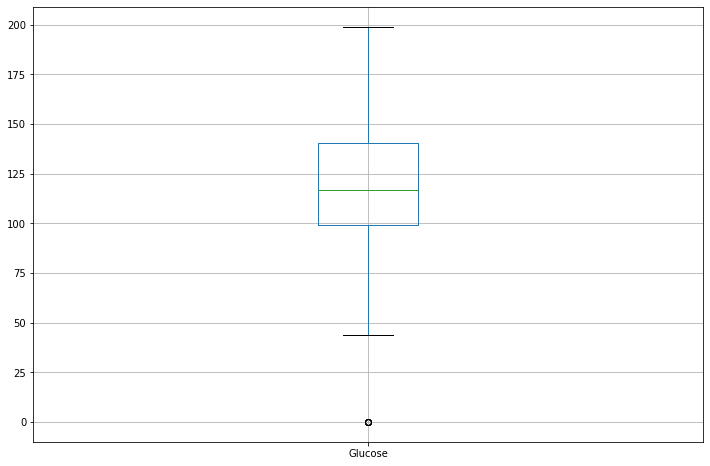

In [124]:
df.boxplot(column=['Glucose'], figsize=(12, 8))
plt.show()

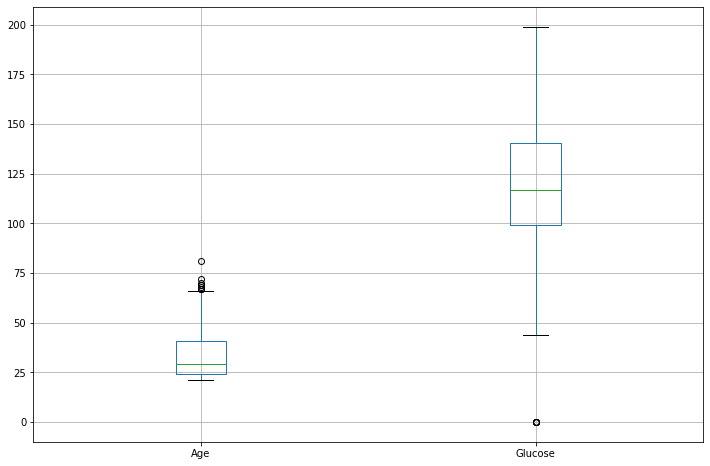

In [125]:
df.boxplot(column=['Age', 'Glucose'], figsize=(12, 8))
plt.show()

### Using the Standard Scaler for Standardizing Numeric Features

In [126]:
# Eliminamos la única caracteristica categórica en estos datos

outcome = df['Outcome']

df = df.drop(['Outcome'], axis = 1)

In [127]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


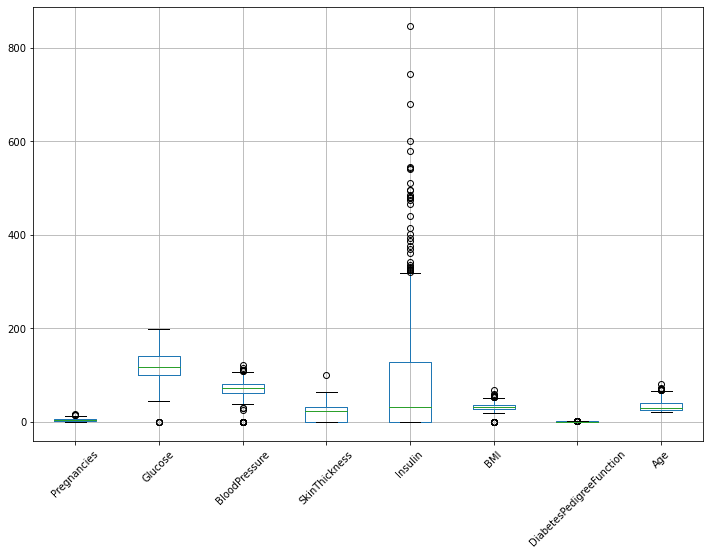

In [128]:
df.boxplot(figsize=(12, 8), rot=45)
plt.show()

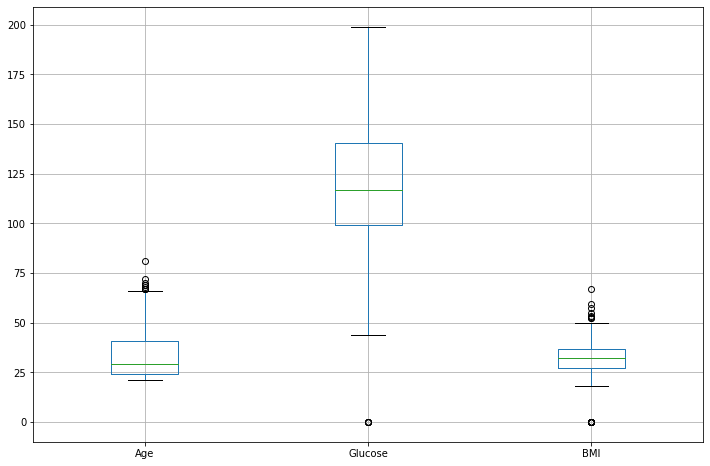

In [129]:
df.boxplot(column=['Age', 'Glucose', 'BMI'], figsize=(12, 8))
plt.show()

In [130]:
# estandarización: es una tecnica en la que para ca punto de datos 
# se realiza la media y se divide por la desviación estándar.

manually_scaled_df = pd.DataFrame()

In [131]:
manually_scaled_df['Age'] = (df['Age'] - np.mean(df['Age'].values)) /\
                              np.std(df['Age'].values)

manually_scaled_df['Glucose'] = (df['Glucose'] - np.mean(df['Glucose'].values)) /\
                              np.std(df['Glucose'].values)

manually_scaled_df['BMI'] = (df['BMI'] - np.mean(df['BMI'].values)) /\
                              np.std(df['BMI'].values)

In [132]:
manually_scaled_df.describe()

,Age,Glucose,BMI
count,7.680000e+02,7.680000e+02,7.680000e+02
mean,1.857600e-16,3.614007e-18,2.295979e-16
std,1.000652e+00,1.000652e+00,1.000652e+00
min,-1.041549e+00,-3.783654e+00,-4.060474e+00
25%,-7.862862e-01,-6.852363e-01,-5.955785e-01
50%,-3.608474e-01,-1.218877e-01,9.419788e-04
75%,6.602056e-01,6.057709e-01,5.847705e-01
max,4.063716e+00,2.444478e+00,4.455807e+00


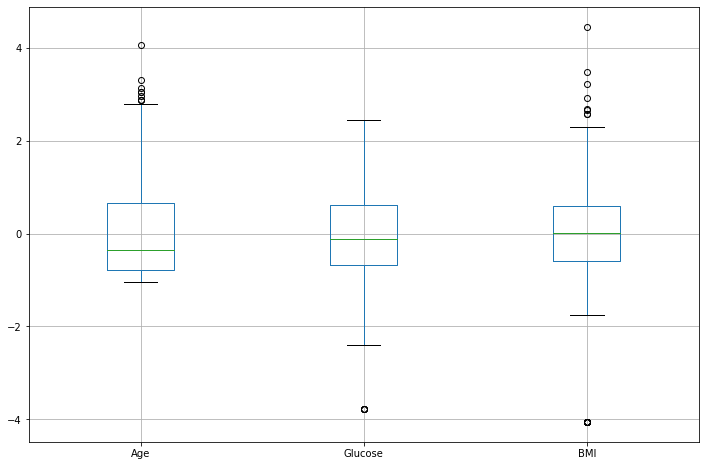

In [133]:
manually_scaled_df.boxplot(column=['Age', 'Glucose', 'BMI'], figsize=(12, 8))
plt.show()

In [134]:
# estadarizacion con sikit-learn

scaled_df = pd.DataFrame()

scaled_df['Glucose'] = scale(df['Glucose'])
scaled_df['BMI'] = scale(df['BMI'])
scaled_df['Age'] = scale(df['Age'])

In [135]:
scaled_df.describe()

,Glucose,BMI,Age
count,7.680000e+02,7.680000e+02,7.680000e+02
mean,3.614007e-18,2.295979e-16,1.857600e-16
std,1.000652e+00,1.000652e+00,1.000652e+00
min,-3.783654e+00,-4.060474e+00,-1.041549e+00
25%,-6.852363e-01,-5.955785e-01,-7.862862e-01
50%,-1.218877e-01,9.419788e-04,-3.608474e-01
75%,6.057709e-01,5.847705e-01,6.602056e-01
max,2.444478e+00,4.455807e+00,4.063716e+00


In [136]:
std_scaler = StandardScaler(copy=True,
                            with_mean=True,
                            with_std=True)

In [137]:
scaled_array = std_scaler.fit_transform(df)

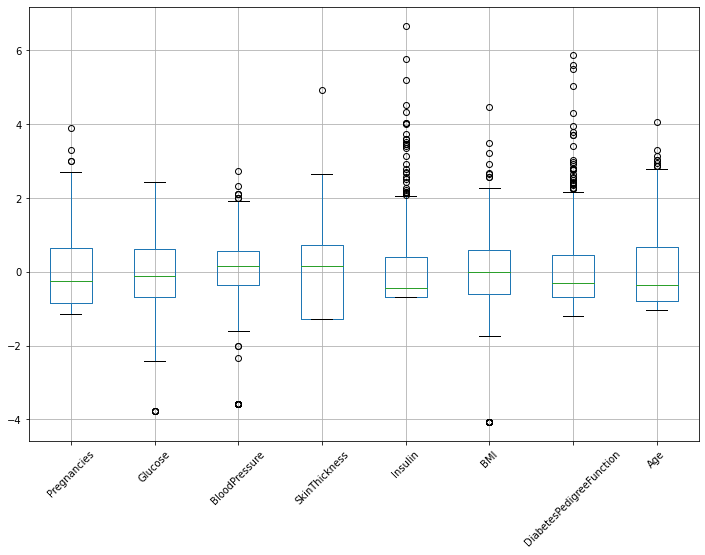

In [138]:
scaled_df = pd.DataFrame(scaled_array, columns=df.columns)

scaled_df.boxplot(figsize=(12, 8), rot=45)
plt.show()

In [139]:
std_scaler.mean_

array([  3.84505208, 120.89453125,  69.10546875,  20.53645833,
        79.79947917,  31.99257812,   0.4718763 ,  33.24088542])

In [140]:
std_scaler.var_

array([1.13392724e+01, 1.02091726e+03, 3.74159449e+02, 2.54141900e+02,
       1.32638869e+04, 6.20790465e+01, 1.09635697e-01, 1.38122964e+02])

In [141]:
std_scaler.scale_

array([  3.36738361,  31.95179591,  19.34320163,  15.94182863,
       115.16894926,   7.87902573,   0.33111282,  11.75257265])

In [142]:
std_scaler.n_samples_seen_

768

In [143]:
# Agregar de nuevo Outcome
scaled_df['Outcome'] = outcome

In [144]:
scaled_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995,1
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672,0
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584,1
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549,0
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496,1


In [145]:
# Escribir los datos procesados en un archivo csv

scaled_df.to_csv('datasets/diabetes_processed.cvs', index=False)

In [146]:
# ver archivos en la carpeta datasets
!dir datasets

 El volumen de la unidad C no tiene etiqueta.
 El n£mero de serie del volumen es: 0C8D-2EAC

 Directorio de C:\Users\kendr\datasets

18/10/2022  14:38    <DIR>          .
18/10/2022  17:04    <DIR>          ..
18/10/2022  13:54            23.873 diabetes.csv
18/10/2022  17:05           123.388 diabetes_processed.cvs
               2 archivos        147.261 bytes
               2 dirs  218.623.512.576 bytes libres


### Using the Robust Scaler to Scale Numeric Features

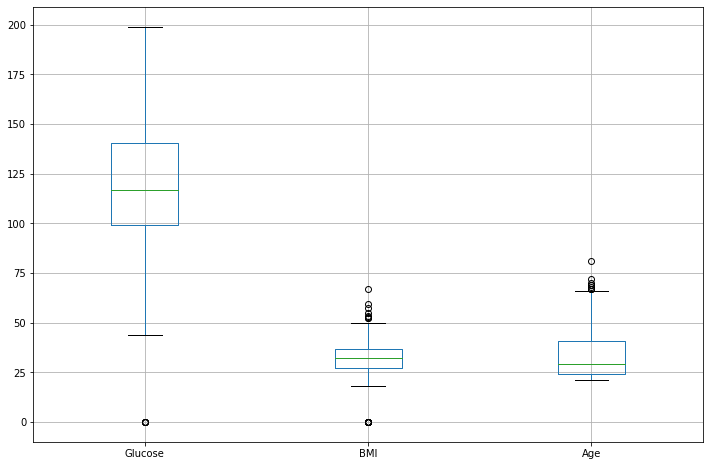

In [147]:
df.boxplot(column=['Glucose', 'BMI', 'Age'], figsize=(12, 8))
plt.show()

In [148]:
robust_scaled_df = pd.DataFrame(robust_scale(df), columns=df.columns)

In [149]:
robust_scaled_df[['Glucose', 'BMI', 'Age']].describe()

,Glucose,BMI,Age
count,768.000000,768.000000,768.000000
mean,0.094413,-0.000798,0.249464
std,0.775094,0.847759,0.691778
min,-2.836364,-3.440860,-0.470588
25%,-0.436364,-0.505376,-0.294118
50%,0.000000,0.000000,0.000000
75%,0.563636,0.494624,0.705882
max,1.987879,3.774194,3.058824


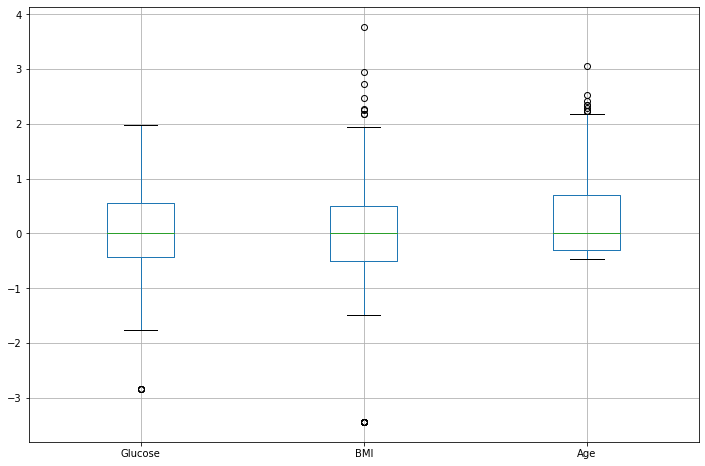

In [150]:
robust_scaled_df.boxplot(column=['Glucose', 'BMI', 'Age'], figsize=(12, 8))

plt.show()

In [151]:
robust_scaler = RobustScaler(copy=True, with_centering=True, with_scaling=True)

robust_scaler

RobustScaler()

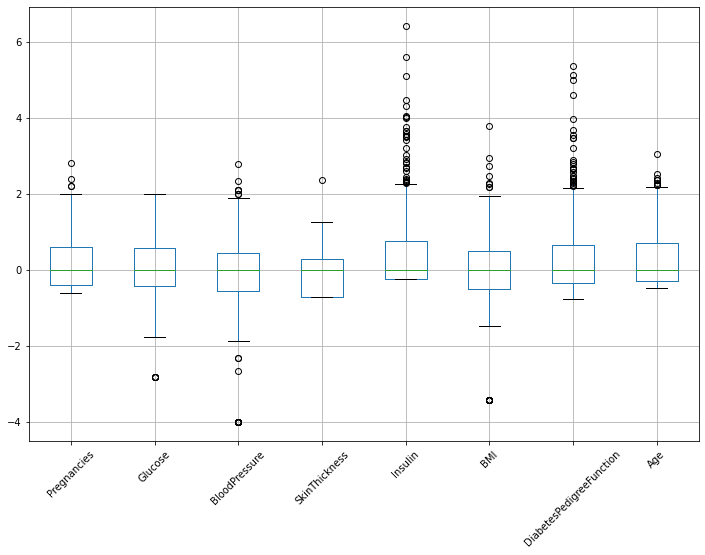

In [152]:
robust_scaled_array = robust_scaler.fit_transform(df)

robust_scaled_df = pd.DataFrame(robust_scaled_array, columns = df.columns)

robust_scaled_df.boxplot(figsize=(12, 8), rot = 45)

plt.show()